# ML Project 1 - Viva

### Build a machine learning (ML) model to predict customer default.

### BUSINESS OBJECTIVES:

The application of scoring models in today’s business environment covers a wide range of objectives. The original task of estimating the risk of default hasbeen augmented by credit scoring models to include other aspects of credit  risk management: at the pre-application stage (identification of potential applicants), at the application stage (identification of acceptable applicants),and at the performance stage (identification of possible behavior of current customers). Scoring models with different objectives have been developed.They can be generalized into four categories as listed below.

Bank would like to develop an ML model to stop the bad loans (stop default) in future.

#### Required Libraries

In [13]:
# data read
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

#Feature scaling
from sklearn.preprocessing import StandardScaler 

#Ignore warrings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt # to visualize 
import seaborn as sns      # to visualize 
from matplotlib import pyplot

#model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #scikit-learn metrics module for accuracy calculation


# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#splitting the data in train and test set
from sklearn.model_selection import train_test_split

#model performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



#### Import data

In [49]:
#read the data
bank_loan = pd.read_csv("bankloans-2c74be35-c811-4097-b6a5-9e7e84b0ab9e.csv")
bank_loan_c = bank_loan

In [51]:
#preview data
bank_loan_c.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,NaN,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31.0,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55.0,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120.0,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28.0,17.3,1.787436,3.056564,1.0


#### Data Preparation

In [52]:
# Datatypes of all columns
print(bank_loan_c.dtypes)

age           int64
ed            int64
employ        int64
address       int64
income      float64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object


In [53]:
#explore the data types
bank_loan_c.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,846.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.492908,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.369605,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.000000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [54]:
#summary of data
bank_loan_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    846 non-null    float64
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 59.9 KB


In [55]:
# All columns
print("All columns:\n",bank_loan_c.columns)
print("\n=======================================================================")
# structure of dataset
print("\nStructure of dataset:",bank_loan_c.shape)

All columns:
 Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')


Structure of dataset: (850, 9)


This dataset is contain 850 observations and 9 features

#### Missing Value Treatment

In [56]:
#check the missing value
bank_loan_c.isnull().sum()

age           0
ed            0
employ        0
address       0
income        4
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

Missing value is present in dataset

In [58]:
bank_loan_c.dropna(axis =0, inplace = True)

In [59]:
#check null values
bank_loan_c.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

Now, there is no missing value exist in this dataset.

#### Feature Scaling

In [60]:
# scaling the data using StandardScaler Scaling process

final_data =StandardScaler()
data_scaled = final_data.fit_transform(bank_loan_c)

#### Feature Selection

In [61]:
# Finding correlation between features
corr = bank_loan_c.corr()
corr.style.background_gradient(cmap ='coolwarm')

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022259,0.535296,0.597610,0.479025,0.017107,0.295588,0.339676,-0.139543
ed,0.022259,1.000000,-0.154122,0.057100,0.231610,0.008915,0.080371,0.165183,0.110079
employ,0.535296,-0.154122,1.000000,0.322171,0.620154,-0.030807,0.403536,0.405753,-0.286437
address,0.597610,0.057100,0.322171,1.000000,0.315900,0.012933,0.209366,0.226732,-0.165307
income,0.479025,0.231610,0.620154,0.315900,1.000000,-0.025698,0.561181,0.613488,-0.080259
debtinc,0.017107,0.008915,-0.030807,0.012933,-0.025698,1.000000,0.510276,0.585380,0.392248
creddebt,0.295588,0.080371,0.403536,0.209366,0.561181,0.510276,1.000000,0.639484,0.238981
othdebt,0.339676,0.165183,0.405753,0.226732,0.613488,0.585380,0.639484,1.000000,0.145129
default,-0.139543,0.110079,-0.286437,-0.165307,-0.080259,0.392248,0.238981,0.145129,1.000000


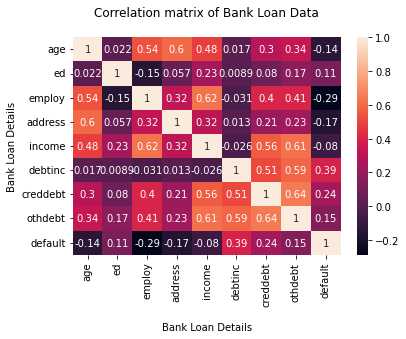

In [63]:
hm = sns.heatmap(bank_loan_c.corr(), annot = True)
hm.set(xlabel='\nBank Loan Details', ylabel='Bank Loan Details', title = "Correlation matrix of Bank Loan Data\n")
plt.show()

default is strongly correlated with income and debtinc.And employ is also correlated with deafult

#### Splitting Data and Train and Test the data

In [64]:
# Split the dataset into train and test sets

X = bank_loan_c.drop("default", axis = 1)
y = bank_loan_c["default"]

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)  #trainset size 70% and test set size 30%

As our traget variable is in binary form. So, we will the build with Classification

## Model 1: Logistic Regression

In [67]:
#define model
Log_Model = LogisticRegression()
Log_Model.fit(X_train, y_train)

LogisticRegression()

In [68]:
#predict the value

y_pred_test = Log_Model.predict(X_test)
print('Predicted value for test set:', y_pred_test,'\n')

Predicted value for test set: [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 



#### Model evaluation

In [69]:
#the accuracy of training and testing dataset
score_train = Log_Model.score(X_train,y_train)
score_test = Log_Model.score(X_test,y_test)

print("Evalate the model on the train data", score_train)
print("Evalate the model on the test data:", score_test)

Evalate the model on the train data 0.839835728952772
Evalate the model on the test data: 0.7464114832535885


In [76]:
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_score = f1_score (y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)

print('Accuracy:', accuracy)
print('Recall:', recall)

print('F1-score:', f1_score)

print('Precision:', precision)

Accuracy: 0.7464114832535885
Recall: 0.43283582089552236
F1-score: 0.5225225225225224
Precision: 0.6590909090909091


#### ROC-AUC : Model Evalation

In [80]:

roc=roc_auc_score(y_test, Log_Model.predict_proba(X_test)[:,1])
print("ROC value for model:", roc)

ROC value for model: 0.7953542148412865


In [88]:
# no skill prediction (majority class)
ns_pred = [0 for _ in range(len(y_test))]

In [93]:
# predict probabilities
log_probs = Log_Model.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.795


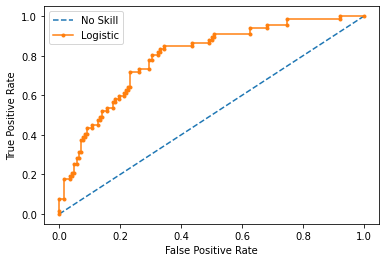

In [94]:
# probabilities for the positive outcome only
log_probs = log_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_pred)
lr_auc = roc_auc_score(y_test, log_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, log_probs)

# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

###### Interpretation:

1. The model score on train data set is about 84% and model score on train data set is 75%, which is a good score.
2. Evaluate the model on below metrics also:
    Accuracy: 0.746
    Recall: 0.432
    F1-score: 0.522
    Precision: 0.659
3. ROC-AUC curve also give the good value for this model: 0.795, which quite good.
    
4. Without skill, ROC AUC=0.500 and with skill or Logistic: ROC AUC=0.795

## Model2: Decision Tree Classifier

In [131]:
# define model

DC_Model = DecisionTreeClassifier(max_depth=3, min_samples_split=5, max_leaf_nodes=10)

# Train Decision Tree Classifer

DC_Model.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, min_samples_split=5)

In [132]:
#Predict the response for test dataset

test_pred_dc = DC_Model.predict(X_test)

#Predict the response for train dataset

train_pred_dc = DC_Model.predict(X_train)

print("Prediction value on test data set:\n" , test_pred_dc)

Prediction value on test data set:
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### Model Evaluation

In [133]:
# Model Accuracy for test data
print("Accuracy for test data:",metrics.accuracy_score(y_test, test_pred_dc))

# Model Accuracy for train data
print("Accuracy for train data:",metrics.accuracy_score(y_train, train_pred_dc))

Accuracy for test data: 0.7129186602870813
Accuracy for train data: 0.839835728952772


In [134]:
#model performance
accuracy_dc = accuracy_score(y_test, test_pred_dc)
recall_dc =   recall_score(y_test, test_pred_dc)
precision_dc = precision_score(y_test, test_pred_dc)

print('accuracy:', accuracy_dc)
print('recall:', recall_dc)
print('precision:', precision_dc)

accuracy: 0.7129186602870813
recall: 0.43283582089552236
precision: 0.5686274509803921


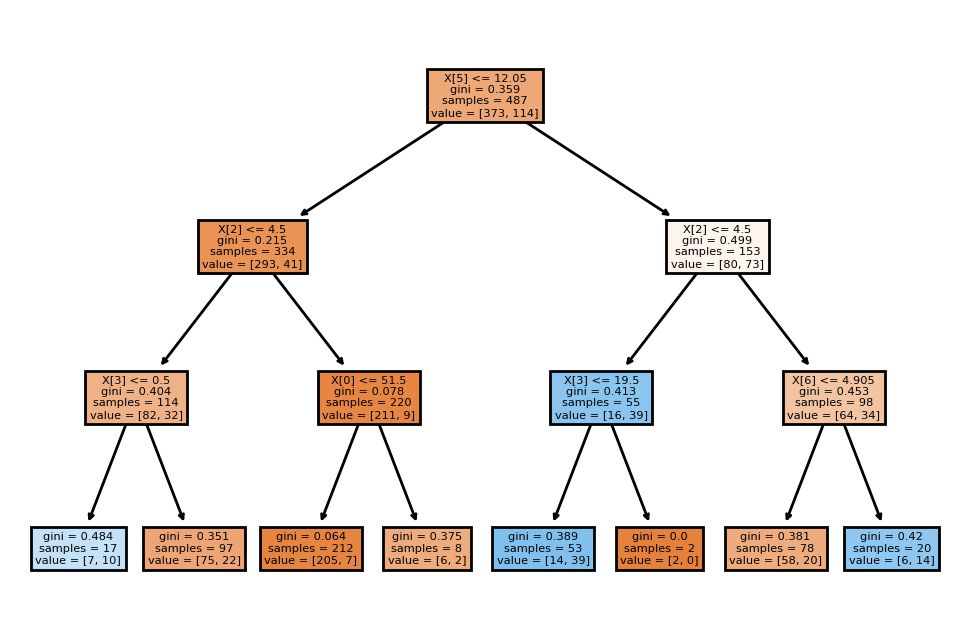

In [135]:
#Visualition of bankloans
from sklearn import tree

fig, axes = plt.subplots(dpi=200)
tree.plot_tree(DC_Model, filled = True);

#save figure in current directory as png
fig.savefig('bank_loans_regression_decisiontree.png')

###### Interpretation:

1. The model score on train data set is about 84% and model score on train data set is 71%, which is a good score.
2. Evaluate the model on below metrics: 
    Accuracy: 0.712 Recall: 0.432 F1-score: 0.522 Precision: 0.568
    
    Performance of the model is good. We can conisder for our business objective


## Model 3: GaussianNB naive bayes classifier

In [138]:
#Build tha model

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [143]:
# Predicting the Test set results  
y_pred_test = NB_model.predict(X_test)

# Predicting the Test set results  
test_pred_nb = NB_model.predict(X_test)

print("Predication probabilities on the test data: \n",test_pred_nb)


#Predicting the Train set results
train_pred_nb = NB_model.predict(X_train)
print("\nPredication probabilities on the train data: \n",train_pred_nb)

Predication probabilities on the test data: 
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Predication probabilities on the train data: 
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

#### Model Evaluation

In [146]:
# Model Accuracy for test data
print("Accuracy for test data:{:.2f}".format(accuracy_score(y_test, test_pred_nb)))

# Model Accuracy for train data
print("Accuracy for train data:{:.2f}".format(metrics.accuracy_score(y_train, train_pred_nb)))

Accuracy for test data:0.71
Accuracy for train data:0.80


In [150]:
# model performance
accuracy_nb = accuracy_score(y_test, test_pred_nb)
recall_nb =   recall_score(y_test, test_pred_nb)
f1_score = f1_score (y_test, test_pred_nb)
precision_nb = precision_score(y_test, test_pred_nb)

print('accuracy:', accuracy_nb)
print('recall:', recall_nb)
print('precision:', precision_nb)
print('F1-score:', f1_score)

accuracy: 0.7081339712918661
recall: 0.29850746268656714
precision: 0.5882352941176471
F1-score: 0.396039603960396


##### Naive Bayes classifier : Interpretation

1. The model score on train data set is about 80% and model score on train data set is 71%, which is a good score.
2. Evaluate the model on below metrics:
    Accuracy: 0.708 Recall: 0.298 F1-score: 0.396 Precision: 0.588
    
    Performance of the model is good. We can conisder for our business objective



### Best Model?


From the above three models, Logistic Regression model is best as we can see the model score on train data set is about 84% and model score on train data set is 75%, which is a highest from other two model.

    Hence, this model is good to use for Business obejective

